# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


# Emotion Recognition of Twitter Dataset using HuggingFace Transformers

## What is Transformers

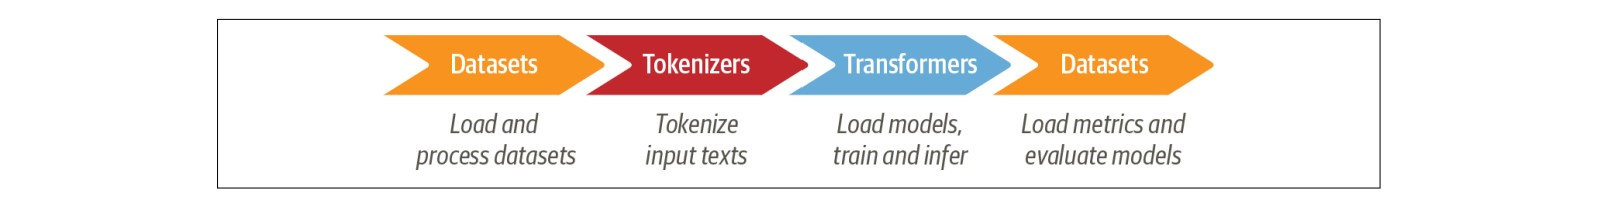

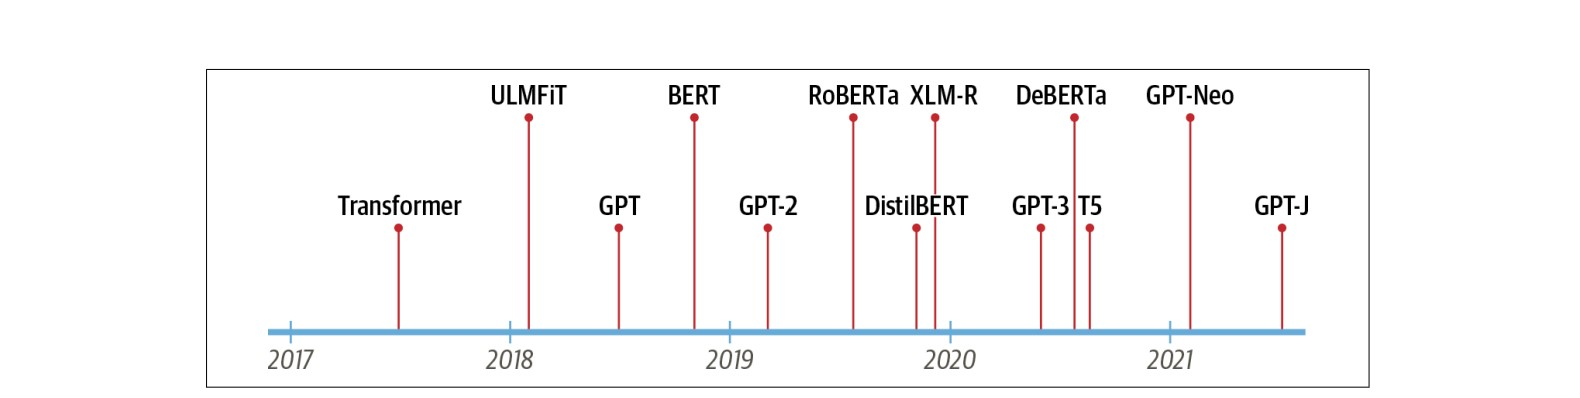


- Transformers are a type of neural network architecture that relies on the attention mechanism. The attention mechanism allows the model to learn long-range dependencies between different parts of a sequence.

- Transformers are typically composed of two main parts: an encoder and a decoder. The encoder takes the input sequence and produces a sequence of hidden states. The decoder then takes these hidden states and produces the output sequence.

- Transformers are now used for a variety of natural language processing tasks, including machine translation, text summarization, and question answering. They have also been used for other tasks, such as speech recognition and computer vision.


## Transformers Architecture

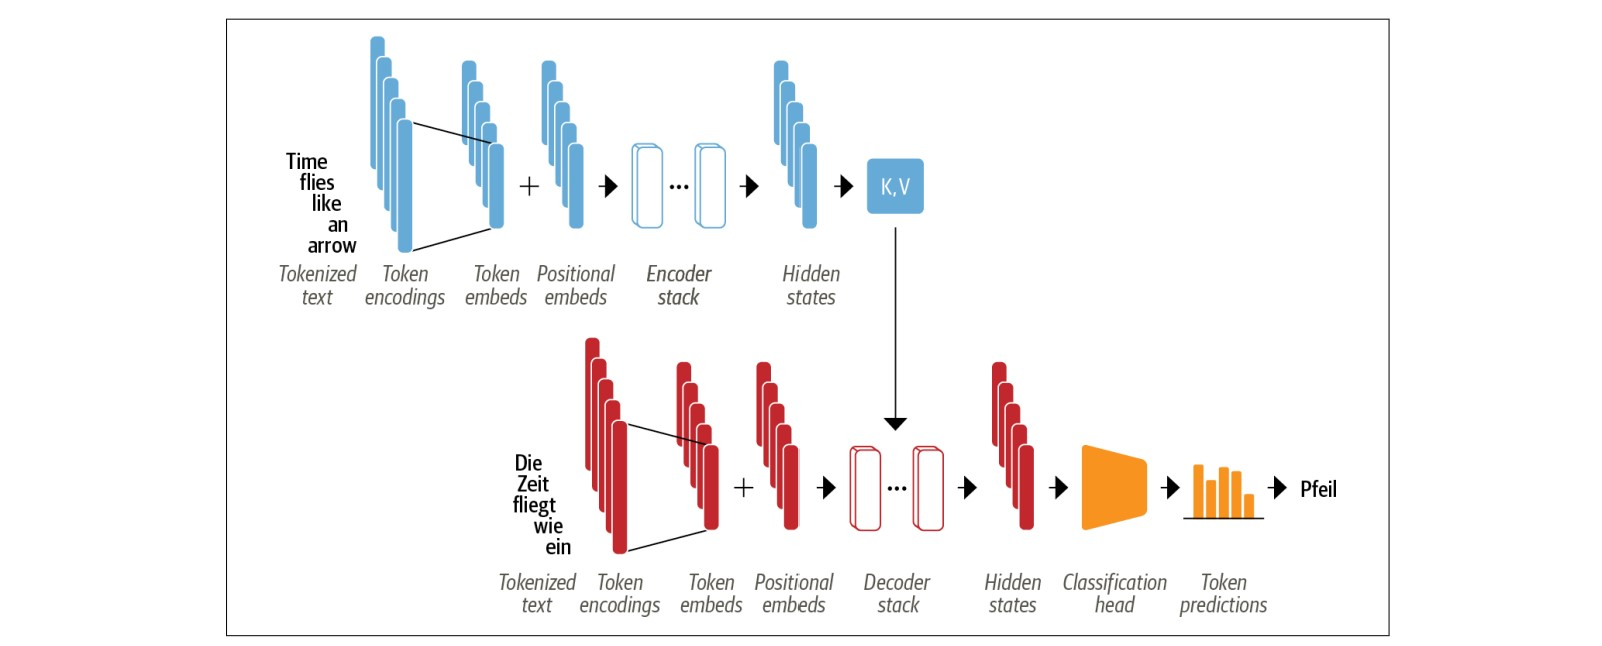

**Tokenized text:**
- The input text is first tokenized, which means that it is broken up into individual words or subwords.

**Token encodings:**
- Each token is then assigned a unique encoding. This encoding represents the meaning of the token and its position in the sequence.

**Token embedding:**
- The token encodings are then passed through a token embedding layer. This layer converts the encodings into a vector representation that can be used by the transformer.

**Positional embedding:**
- The positional embedding layer adds a positional encoding to the token embeddings. This encoding represents the position of each token in the sequence.

**Encode stack:**
- The token embeddings and positional embeddings are then passed through a stack of encoder layers. Each encoder layer applies a self-attention mechanism to the embeddings.
- The self-attention mechanism allows the model to learn long-range dependencies between different parts of the sequence.

**Hidden states:**
- The output of the encoder stack is a sequence of hidden states. These hidden states represent the representation of the input sequence.

**Decoder stack:**
- The hidden states are then passed through a stack of decoder layers. The decoder layers apply a self-attention mechanism and an attention mechanism to the hidden states. The attention mechanism allows the model to attend to different parts of the input sequence when generating the output sequence.


## Text Classification Architecture

https://huggingface.co/datasets/dair-ai/emotion

- Text classification is one of the most common tasks in NLP; it can be used for a broad range of applications, such as tagging customer feedback into categories or routing support tickets according to their language.

- smam classification, sentiment classification, toxic comment, emotion classification etc.


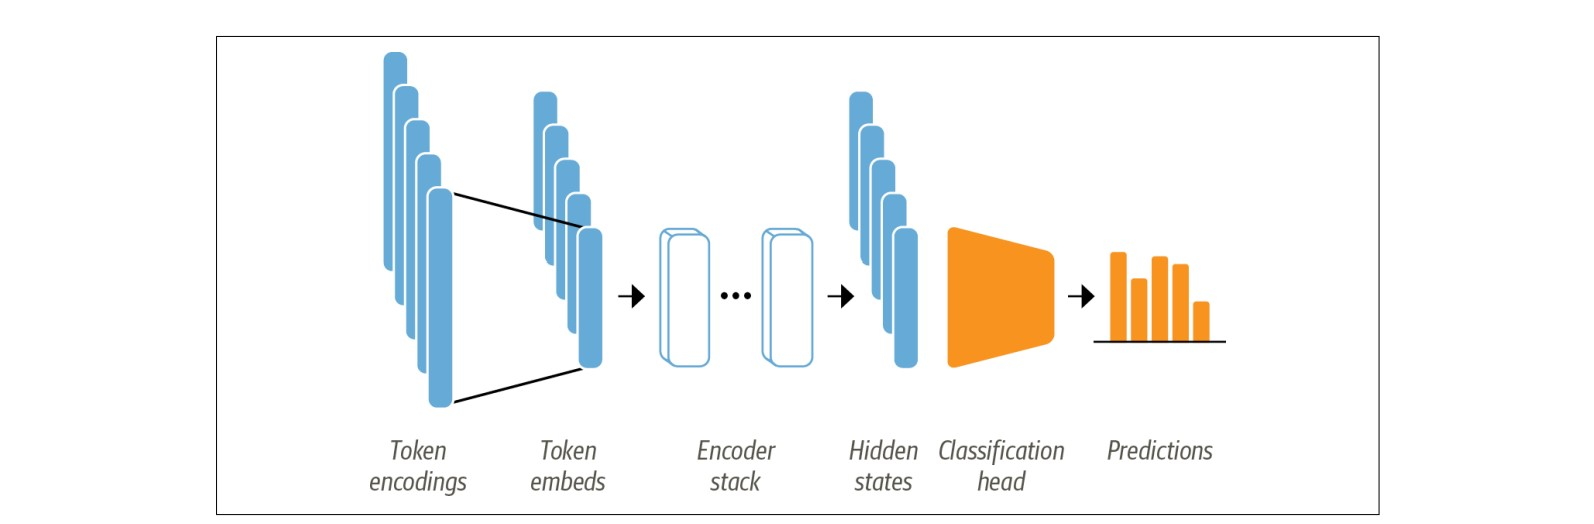

## Coding

In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn

In [2]:
import pandas as pd
from datasets import list_datasets

In [3]:
all_datasets = list_datasets()

<ipython-input-3-f6f3a82aff2d>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


In [4]:
len(all_datasets)

50207

In [5]:
'dair-ai/emotion' in all_datasets

True

In [6]:
from datasets import load_dataset

emotion = load_dataset('emotion')
emotion.set_format(type='pandas')

In [7]:
df = emotion['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [8]:
classes = emotion['train'].features['label'].names
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [9]:
df['label_name'] = df['label'].apply(lambda x: classes[x])

In [10]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Dataset Analysis

In [11]:
import matplotlib.pyplot as plt


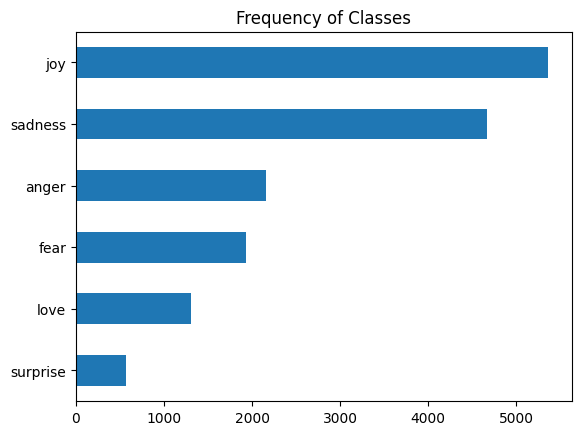

In [12]:
label_counts = df['label_name'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title('Frequency of Classes')
plt.show()

<Axes: title={'center': 'Words Per Tweet'}, xlabel='label_name'>

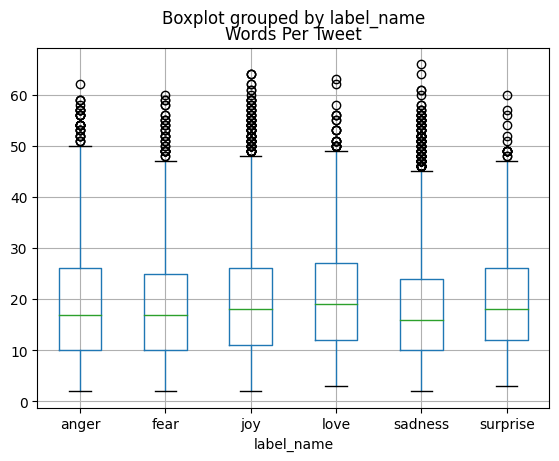

In [13]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot("Words Per Tweet", by='label_name')

## Text to Tokens Conversion
- Transformer models like DistilBERT cannot receive raw strings as input; instead, they assume the text has been tokenized and encoded as numerical vectors.
- Tokenization is the step of breaking down a string into the atomic units used in the model

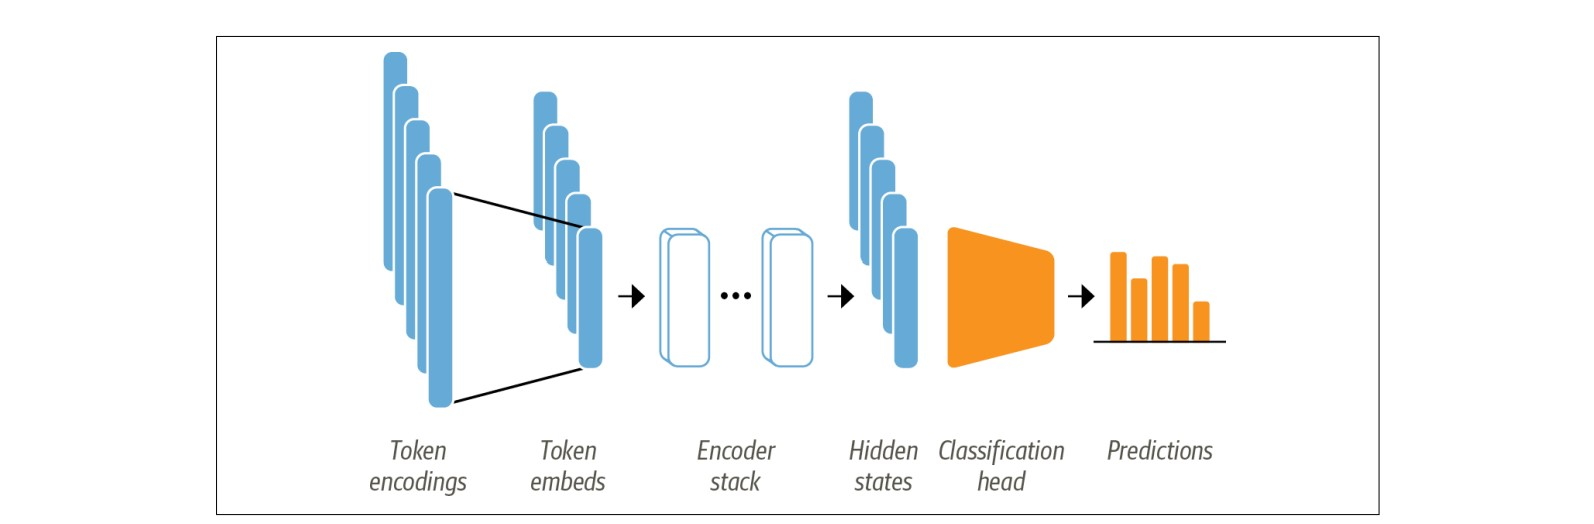

In [14]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [15]:
text = "I love Machine Learning!. Tokenization is awesome"
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2293, 3698, 4083, 999, 1012, 19204, 3989, 2003, 12476, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [16]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'i', 'love', 'machine', 'learning', '!', '.', 'token', '##ization', 'is', 'awesome', '[SEP]']


In [17]:
tokenizer.vocab_size, tokenizer.model_max_length

(30522, 512)

## Tokenization of the Emotion Data

In [18]:
emotion.reset_format()

In [19]:
# map() method would be used

def tokenize(batch):
  temp =tokenizer(batch['text'], padding=True, truncation=True)
  return temp

print(tokenize(emotion["train"][:5]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 2113, 2008, 2009, 2003, 2145, 2006, 1996, 3200, 102, 0], [101, 1045, 2572, 3110, 24665, 7140, 11714, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [20]:
emotions_encoded = emotion.map(tokenize, batched=True, batch_size=None)

In [21]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

## Model Building

In [22]:
text

'I love Machine Learning!. Tokenization is awesome'

In [23]:
inputs = tokenizer(text, return_tensors='pt')
inputs

{'input_ids': tensor([[  101,  1045,  2293,  3698,  4083,   999,  1012, 19204,  3989,  2003,
         12476,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [24]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained(model_ckpt)

In [25]:
with torch.no_grad():
  outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

In [26]:
last_hidden_states.shape

torch.Size([1, 12, 768])

## Fine-Tuning Transformers

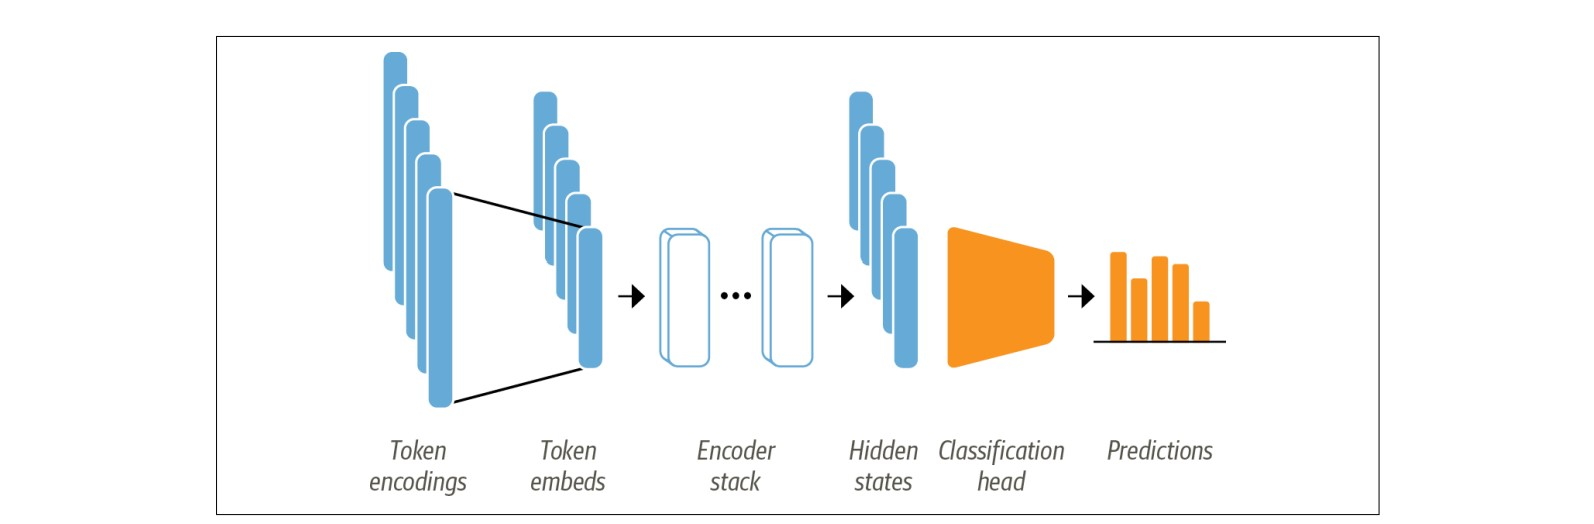

- `AutoModelForSequenceClassification` model has a classification head on top of the pretrained model outputs

- The first thing we need is a pretrained DistilBERT model like the one we used in the feature-based approach.
- The only slight modification is that we use the `AutoModelForSequenceClassification` model instead of AutoModel.
- The difference is that the `AutoModelForSequenceClassification` model has a classification head on top of the pretrained model outputs, which can be easily trained with the base model.

In [27]:
from transformers import AutoModelForSequenceClassification

num_labels = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
device

device(type='cuda')

In [29]:
from transformers import TrainingArguments

In [30]:
batch_size = 64
model_name = "distilbert-finetuned-emotion"

training_args = TrainingArguments(output_dir = model_name,
                                 num_train_epochs=2,
                                 learning_rate = 2e-5,
                                 per_device_train_batch_size= batch_size,
                                 per_device_eval_batch_size = batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy = 'epoch',
                                  disable_tqdm=False)

In [34]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}


In [35]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded['train'],
                  eval_dataset=emotions_encoded['validation'],
                  tokenizer=tokenizer)

In [36]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.176213,0.935500,0.936419
2,0.177400,0.157233,0.934500,0.934995


TrainOutput(global_step=500, training_loss=0.17741519165039063, metrics={'train_runtime': 222.2767, 'train_samples_per_second': 143.965, 'train_steps_per_second': 2.249, 'total_flos': 720342861696000.0, 'train_loss': 0.17741519165039063, 'epoch': 2.0})

In [37]:
preds_outputs = trainer.predict(emotions_encoded['test'])
preds_outputs.metrics

{'test_loss': 0.1699439436197281,
 'test_accuracy': 0.927,
 'test_f1': 0.9274348606811087,
 'test_runtime': 3.6357,
 'test_samples_per_second': 550.102,
 'test_steps_per_second': 8.802}

In [39]:
import numpy as np
y_preds = np.argmax(preds_outputs.predictions, axis=1)
y_true = emotions_encoded['test'][:]['label']

In [40]:
from sklearn.metrics import classification_report
print(classes)
print(classification_report(y_true, y_preds))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       581
           1       0.96      0.94      0.95       695
           2       0.79      0.91      0.85       159
           3       0.93      0.93      0.93       275
           4       0.87      0.90      0.89       224
           5       0.75      0.68      0.71        66

    accuracy                           0.93      2000
   macro avg       0.88      0.89      0.88      2000
weighted avg       0.93      0.93      0.93      2000



In [42]:
label_counts

surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: label_name, dtype: int64

In [54]:
text = 'i want to kill you'
input_encoded = tokenizer(text, return_tensors='pt').to(device)
with torch.no_grad():
  outputs = model(**input_encoded)

logits = outputs.logits
pred = torch.argmax(logits, dim=1).item()
pred, classes[pred]

(3, 'anger')

In [49]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[-1.1845,  5.1853, -1.4174, -1.6769, -1.4191, -0.4804]],
       device='cuda:0'), hidden_states=None, attentions=None)